In [186]:
!pip install statsmodels
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [187]:
!pip install openpyxl
data = pd.read_excel('../data/Folds5x2_pp.xlsx', sheet_name=0)

In [188]:
print(data.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [189]:
print(data.columns)

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


1B) i)  Exploring the data


In [191]:
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])

Number of rows:  9568
Number of columns:  5


The rows represent difference instances or data points collected over 6 years from 2006 to 2011 
when the power plant was set to work with full load. 
The columns
1) Features: AT (Ambient Temperature in C), V (Exhaust Vacuum cm Hg), AP (Ambient Pressure in millibar),
RH: Relative Humidity in %
2) Target variable: PE: Net hourly electrical energy output in MW

1B) ii) Pairwise Scatterplots. We will use Seaborn for this

In [192]:
import seaborn as sns

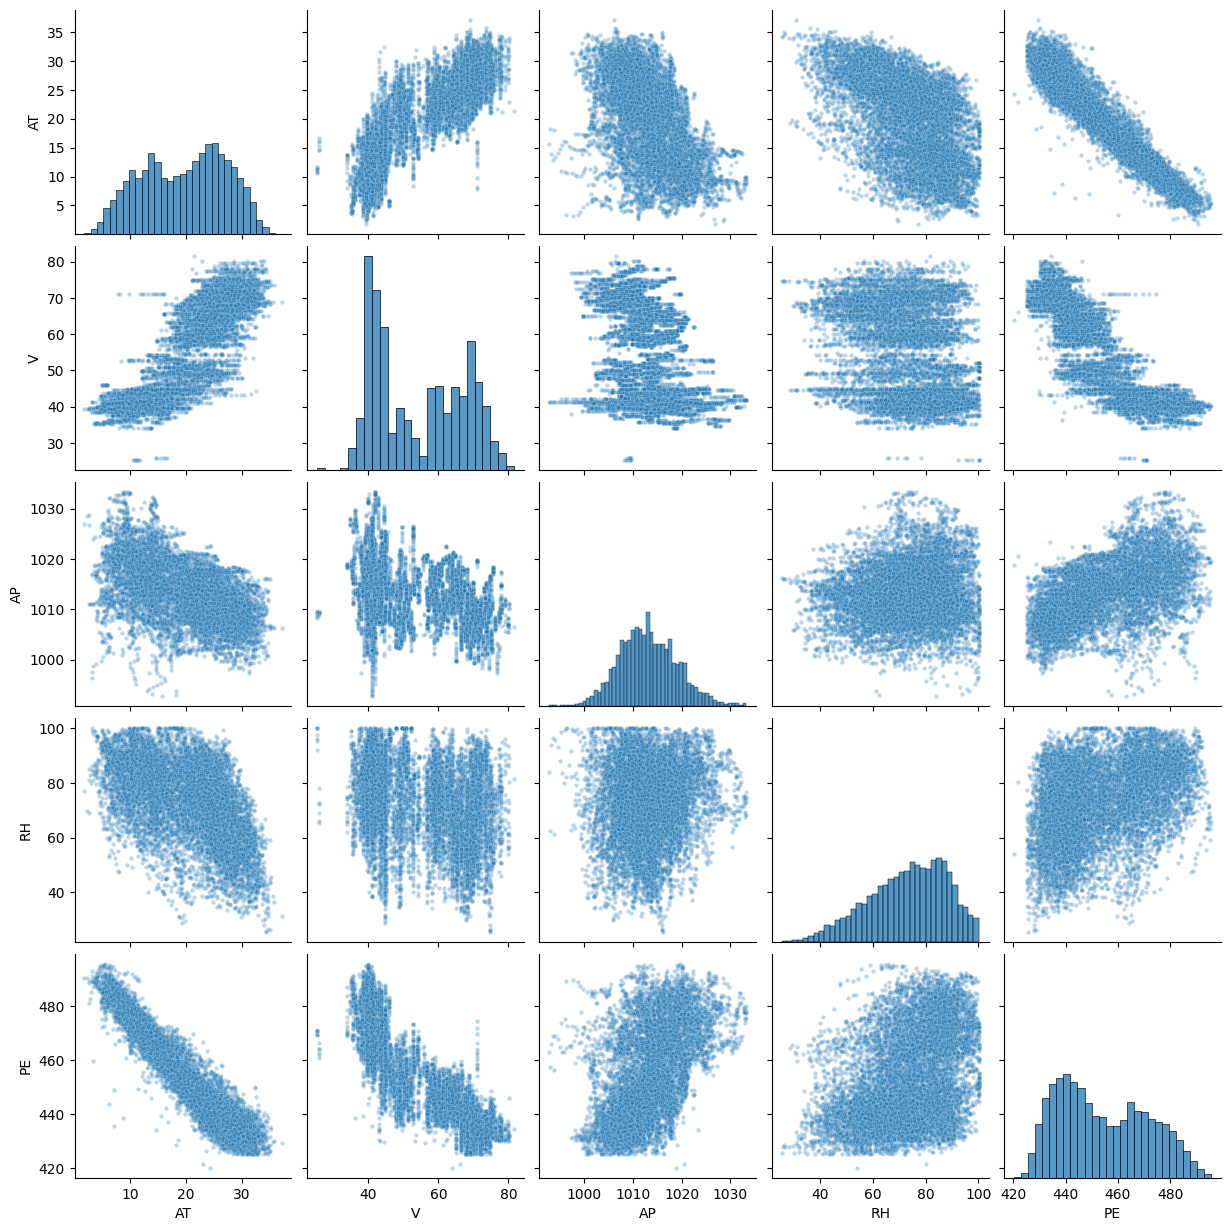

In [193]:
sns.pairplot(data, plot_kws={'s': 10, 'alpha': 0.3})
plt.show()

Findings:
Target PE vs features: 
1) AT Ambient Temperature has a strong negative correlation with PE. Higher ambient temperature is associated with lower power output. But there are some outliers. 
2) Similarly, as V increases, PE decreases.
3) There does not appear to be any strong pattern when you plot PE vs AP and PE vs RH  
Among the features: 
4) Among the features (independent variables), there is a postitive correlationbetween V and AT. As V increases, AT also increases. Thus, we can explore if there is any collinearity here. 
5) AT & RH: There could be a weak negative correlation here. As AT increases, RH decreases. We need to explore the collinearity here. 
6) Most of the features have a distribution similar to normal distribution but V has some values that are spiking. RH values are slightly skewed towards the right.  

1B) iii) mean, the median, range, rst and third quartiles, and in-terquartile ranges

In [194]:
#Summary Statistics
summary = data.describe()
summary

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

In [195]:
#for median, range, and interquartile range Q3 - Q1
summary.loc['median'] = data.median()
summary.loc['range'] = summary.loc['max'] - summary.loc['min']
summary.loc['IQR'] = summary.loc['75%'] - summary.loc['25%']
summary

AT            V           AP           RH           PE
count   9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean      19.651231    54.305804  1013.259078    73.308978   454.365009
std        7.452473    12.707893     5.938784    14.600269    17.066995
min        1.810000    25.360000   992.890000    25.560000   420.260000
25%       13.510000    41.740000  1009.100000    63.327500   439.750000
50%       20.345000    52.080000  1012.940000    74.975000   451.550000
75%       25.720000    66.540000  1017.260000    84.830000   468.430000
max       37.110000    81.560000  1033.300000   100.160000   495.760000
median    20.345000    52.080000  1012.940000    74.975000   451.550000
range     35.300000    56.200000    40.410000    74.600000    75.500000
IQR       12.210000    24.800000     8.160000    21.502500    28.680000

1C) Simple Linear Regression

In [196]:
y_obs = data["PE"] #Y observations 

#Need to add intercept for each feature in statmodels. 
# https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

#Model 1: PE vs. AT
x_AT = sm.add_constant(data["AT"])
results_AT = sm.OLS(y_obs, x_AT).fit()
print("Regression results for PE vs. AT") 
print(results_AT.summary())

Regression results for PE vs. AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:10   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.03

II) PE vs. V

In [197]:
#Model 2: PE vs. V
x_V = sm.add_constant(data["V"])
results_V = sm.OLS(y_obs, x_V).fit()
print("Regression results for PE vs. V") 
print(results_V.summary())

Regression results for PE vs. V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:11   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.801

In [198]:
#Model 3: PE vs. AP
x_AP = sm.add_constant(data["AP"])
results_AP = sm.OLS(y_obs, x_AP).fit()
print("Regression results for PE vs. AP") 
print(results_AP.summary())

Regression results for PE vs. AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:11   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.26

In [199]:
#Model 4: PE vs. RH
x_RH = sm.add_constant(data["RH"])
results_RH = sm.OLS(y_obs, x_RH).fit()
print("Regression results for PE vs. RH") 
print(results_RH.summary())

Regression results for PE vs. RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:11   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.96

RESULTS: 
1) P- VALUES FOR ALL THE MODELS ARE < 0.05 WHICH INDICATE THEY ARE STATISTICALLY SIGNIFICANT.
2) HOWEVER, WHEN WE LOOK AT THE R-SQUARED,
   a) R-squared is high for PE vs. AT (90%) and PE vs. V (76%). Which means a large portion of PE is explained by these
   features
   b) However, R-squared values are low for AP (27%) and RH (15%) which means that these features do not explain a lot of the variation in PE. These variables need to be explored further.
   Next, we will plot the regression lines to back up the observations

PLOTS: Lines for regression lines and scatter points for the observations 

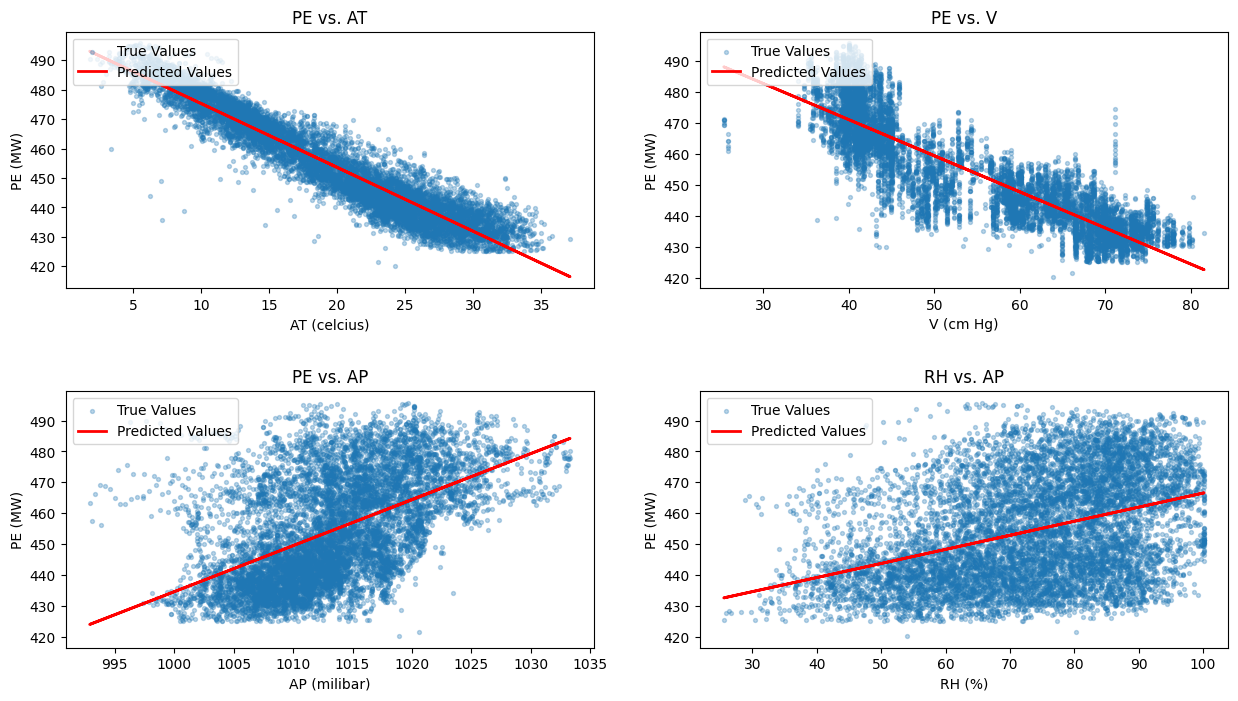

In [200]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
plt.subplots_adjust(hspace = 0.4)

# Plot 1: PE vs. AT
y_pred_AT = results_AT.predict(x_AT)
axes[0,0].scatter(data["AT"], y_obs,  label = "True Values", alpha = 0.3, s = 8)
axes[0,0].plot(data["AT"], y_pred_AT, label = "Predicted Values", color = 'red', linewidth = 2)
axes[0,0].set_title("PE vs. AT")
axes[0,0].legend(loc = "upper left")
axes[0,0].set_xlabel("AT (celcius)")
axes[0,0].set_ylabel("PE (MW)")

#Plot 2: PE vs. V
y_pred_V = results_V.predict(x_V)
axes[0,1].scatter(data["V"], y_obs,  label = "True Values", alpha = 0.3, s = 8)
axes[0,1].plot(data["V"], y_pred_V, label = "Predicted Values", color = 'red', linewidth = 2)
axes[0,1].set_title("PE vs. V")
axes[0,1].legend(loc = "upper left")
axes[0,1].set_xlabel("V (cm Hg)")
axes[0,1].set_ylabel("PE (MW)")


#Plot 3: PE vs. AP
y_pred_AP = results_AP.predict(x_AP)
axes[1,0].scatter(data["AP"], y_obs,  label = "True Values", alpha = 0.3, s = 8)
axes[1,0].plot(data["AP"], y_pred_AP, label = "Predicted Values", color = 'red', linewidth = 2)
axes[1,0].set_title("PE vs. AP")
axes[1,0].legend(loc = "upper left")
axes[1,0].set_xlabel("AP (milibar)")
axes[1,0].set_ylabel("PE (MW)")

#Plot 4: PE vs. RH
y_pred_RH = results_RH.predict(x_RH)
axes[1,1].scatter(data["RH"], y_obs,  label = "True Values", alpha = 0.3, s = 8)
axes[1,1].plot(data["RH"], y_pred_RH, label = "Predicted Values", color = 'red', linewidth = 2)
axes[1,1].set_title("RH vs. AP")
axes[1,1].legend(loc = "upper left")
axes[1,1].set_xlabel("RH (%)")
axes[1,1].set_ylabel("PE (MW)")
plt.show()


We can see from the graphs that the PE vs. AT, PE vs. V, and PE vs. AP have good correlation.
However, there is a weaker pattern for RH vs. AP 

Potential outliers to remove: 
1. PE vs. V: There are some outliers here with V values lower than 30 which could reduce accuracy.
   We want to exclude such extreme low values of V. 
   There are also outliers at V = 70 where the observed y values are far from predicted values. 
2.  PE vs. AP. There are outliers here between AP: 995 to 1000 for which PE values are much higher than predicted values.

To further explore outlier influence, I will use the Cooks Distance method for outliers. 
Reference: https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence

In [201]:
from statsmodels.stats.outliers_influence import OLSInfluence

cooks_AT = OLSInfluence(results_AT).cooks_distance[0]
cooks_V = OLSInfluence(results_V).cooks_distance[0]
cooks_AP = OLSInfluence(results_AP).cooks_distance[0]
cooks_RH = OLSInfluence(results_RH).cooks_distance[0]

cooks_threshold = 4 / len(data)

outliers_AT = data[cooks_AT > cooks_threshold]
outliers_V = data[cooks_V > cooks_threshold]
outliers_AP = data[cooks_AP > cooks_threshold]
outliers_RH = data[cooks_RH > cooks_threshold]

print("Outliers for AT: ")
print(outliers_AT)

print("Outliers for V: ")
print(outliers_V)

print("Outliers for AP: ")
print(outliers_V)

print("Outliers for RH: ")
print(outliers_V)

Outliers for AT: 
         AT      V       AP     RH      PE
21     5.41  40.07  1019.16  64.77  495.24
61    29.01  65.71  1013.61  48.07  446.22
87    32.72  69.75  1009.60  49.35  437.99
89    35.56  68.94  1006.56  38.75  429.69
121   27.54  66.93  1017.06  55.20  450.22
...     ...    ...      ...    ...     ...
9452  33.20  73.88  1005.67  48.48  438.12
9475  30.26  59.22  1013.18  61.08  442.98
9477  34.03  73.56  1006.49  51.07  440.29
9542   5.01  39.40  1003.69  91.90  475.34
9559  26.22  49.82  1015.48  55.80  454.20

[416 rows x 5 columns]
Outliers for V: 
         AT      V       AP      RH      PE
2      5.11  39.40  1012.16   92.14  488.56
21     5.41  40.07  1019.16   64.77  495.24
24    27.36  48.60  1003.18   54.93  436.06
47    21.22  43.43  1010.96   61.07  448.06
57     5.91  39.33  1010.18   95.53  491.49
...     ...    ...      ...     ...     ...
9359  24.00  75.23  1010.69   72.46  443.78
9394  20.48  39.72  1001.61   57.32  455.58
9404  23.82  44.89  1009.39  

1D) Multiple Regression Model

In [202]:
x = data[["AT", "V", "AP", "RH"]]
x = pd.DataFrame(x, columns=["AT", "V", "AP", "RH"])
x_multiple = sm.add_constant(x)
results_multiple = sm.OLS(y_obs, x_multiple).fit()
print(results_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:12   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

FINDINGS:
1) R-squared = 93% which has improved vs. the simple regression model where we got a max P squared of 90%.
   This implies that 30% of the remaining unexplained variation was explained by fitting multiple regression models. 
2) p-values for all predictors are <0.05 -> statistically significant, we reject null hypothesis for all predictors

1E) Plotting coefficient estimates 

C:\Users\navya\AppData\Local\Temp\ipykernel_14568\1030274102.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeff_simple = [results_AT.params[1], results_V.params[1], results_AP.params[1], results_RH.params[1]]
C:\Users\navya\AppData\Local\Temp\ipykernel_14568\1030274102.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeff_multiple = [results_multiple.params[1],results_multiple.params[2],results_multiple.params[3], results_multiple.params[4]]


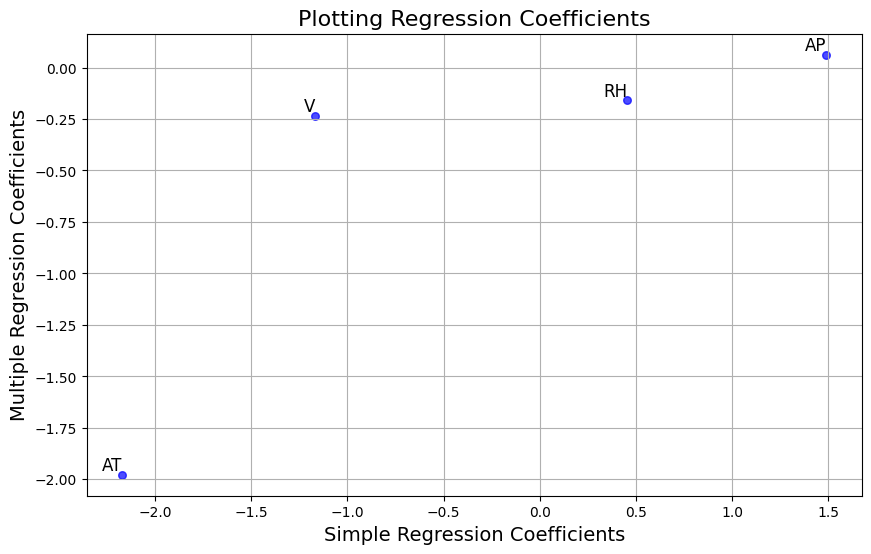

In [203]:
#https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html#

coeff_simple = [results_AT.params[1], results_V.params[1], results_AP.params[1], results_RH.params[1]]
coeff_multiple = [results_multiple.params[1],results_multiple.params[2],results_multiple.params[3], results_multiple.params[4]]
coeff_labels = ["AT", "V", "AP", "RH"]
plt.figure(figsize=(10,6))
plt.scatter(coeff_simple, coeff_multiple, color = 'blue', alpha = 0.7, s = 30)
plt.text(coeff_simple[0], coeff_multiple[0], coeff_labels[0], fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(coeff_simple[1], coeff_multiple[1], coeff_labels[1], fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(coeff_simple[2], coeff_multiple[2], coeff_labels[2], fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(coeff_simple[3], coeff_multiple[3], coeff_labels[3], fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.grid(True)
plt.xlabel("Simple Regression Coefficients", size = 14)
plt.ylabel("Multiple Regression Coefficients", size = 14)
plt.title("Plotting Regression Coefficients", size = 16)
plt.show()



The coefficients in simple regression tend to be larger in magnitude than those in multiple regression because simple regression considers only one predictor at a time, ignoring the influence of other variables.

In contrast, multiple regression accounts for the combined effect of all predictors simultaneously, distributing the explained variation among them. As a result, each predictor’s unique contribution is isolated, leading to smaller coefficient values compared to simple regression. In a simple regression, a single variable may falsely appear more influential due to omitted variable bias.


1F)Citing Section 3.3.3, 1 from ISLR, to check for Non-linearity of data, we will use residual plots
as a graphical tool for identifying non-linearity. For multiple regression model, we plot residuals versus the 
predicted or fitted values. 

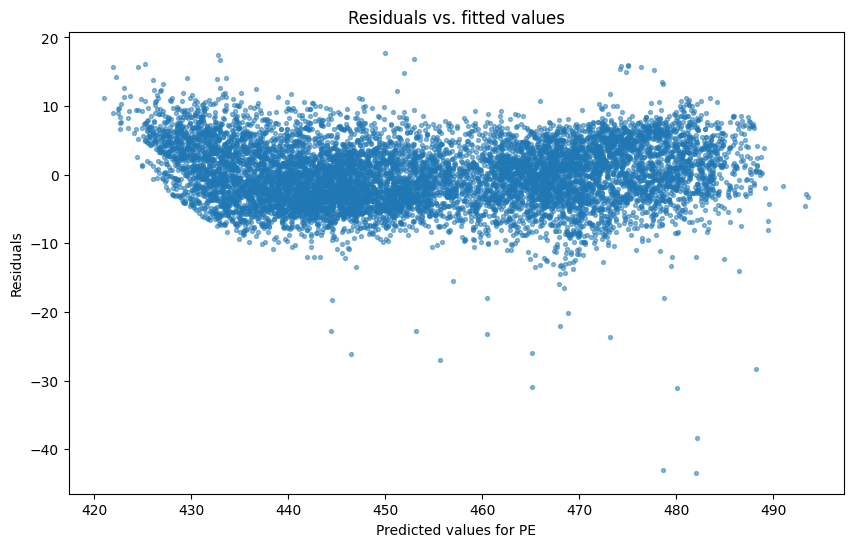

In [204]:
y_pred = results_multiple.predict(x_multiple)

#Residual calculations
y_residuals = y_obs - y_pred

plt.figure(figsize = (10,6))
plt.scatter(y_pred, y_residuals, alpha = 0.5, s = 8)

plt.xlabel("Predicted values for PE")
plt.ylabel("Residuals")
plt.title("Residuals vs. fitted values")
plt.show()

From the residual plot, there appears to be no pattern in residuals, thus not showing a strong indication
of non-linearity in the data. 
But we will explore this further by fitting a quadratic equation for different predictors. 

https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features


We will also plot residuals for each simple regression.

Text(0, 0.5, 'Residuals for PE')

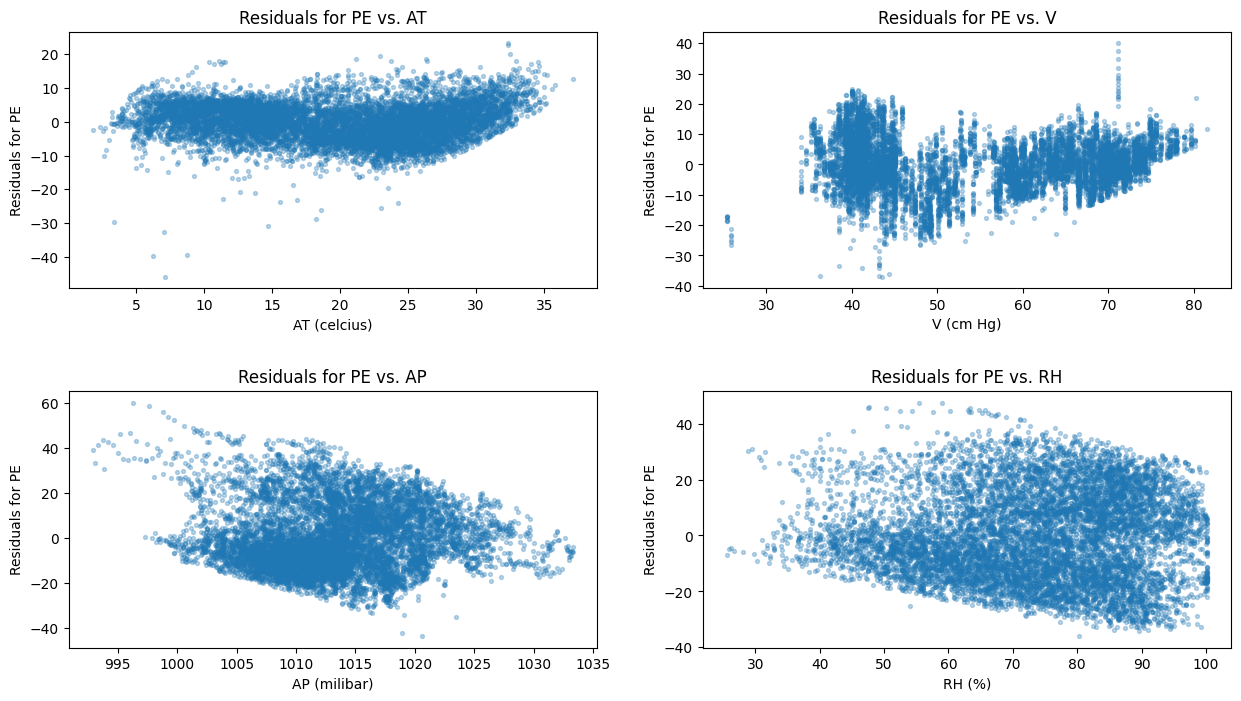

In [205]:
y_pred = results_multiple.predict(x_multiple)

#Residual calculations for each regression model
y_residuals_AT = y_obs - y_pred_AT
y_residuals_V = y_obs - y_pred_V
y_residuals_AP = y_obs - y_pred_AP
y_residuals_RH = y_obs - y_pred_RH

# plt.figure(figsize = (10,6))
# plt.scatter(y_pred, y_residuals, alpha = 0.5, s = 8)

# plt.xlabel("Predicted values for PE")
# plt.ylabel("Residuals")
# plt.title("Residuals vs. fitted values")
# plt.show()

fig, axes = plt.subplots(2,2, figsize=(15,8))
plt.subplots_adjust(hspace = 0.4)
# Plot 1: Residuals vs. AT
axes[0,0].scatter(data["AT"], y_residuals_AT, alpha = 0.3, s = 8)
axes[0,0].set_title("Residuals for PE vs. AT")
axes[0,0].set_xlabel("AT (celcius)")
axes[0,0].set_ylabel("Residuals for PE")

#Plot 2: Residuals vs. V
axes[0,1].scatter(data["V"], y_residuals_V, alpha = 0.3, s = 8)
axes[0,1].set_title("Residuals for PE vs. V")
axes[0,1].set_xlabel("V (cm Hg)")
axes[0,1].set_ylabel("Residuals for PE")


#Plot 3: Residuals vs. AP
axes[1,0].scatter(data["AP"], y_residuals_AP, alpha = 0.3, s = 8)
axes[1,0].set_title("Residuals for PE vs. AP")
axes[1,0].set_xlabel("AP (milibar)")
axes[1,0].set_ylabel("Residuals for PE")

#Plot 4: Residuals vs. RH
axes[1,1].scatter(data["RH"], y_residuals_RH, alpha = 0.3, s = 8)
axes[1,1].set_title("Residuals for PE vs. RH")
axes[1,1].set_xlabel("RH (%)")
axes[1,1].set_ylabel("Residuals for PE")


Findings:
1. FROM THE ABOVE PLOT, WE CAN SEE SOME PATTERN IN RESIDUALS FOR PE vs. AT, possibly suggesting SOME NON-LINEARITY
2. WE DONT SEE ANY PATTERN FOR RESIDUALS VS. V, SUGGESTING NO OR LITTLE NON-LINEARITY HERE
3. TTHERE IS A SLIGHT NEGATIVE CORRELATION FOR RESIDUALS vs. AP and RH, SUGGESTING SOME NON-LINEARITY
THUS, THERE IS POTENTIAL NON-LINEARITY FOR AT, V, and RH WHICH WE WILL EXPLORE FURTHER

Plotting Regression Models for polynomial terms for each coefficient

In [206]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)

# Apply polynomial transformation first
x_AT_poly = poly.fit_transform(data[["AT"]])
x_V_poly = poly.fit_transform(data[["V"]])
x_AP_poly = poly.fit_transform(data[["AP"]])
x_RH_poly = poly.fit_transform(data[["RH"]])

#Convert to dataframe and add column names for readability
x_AT_poly = pd.DataFrame(x_AT_poly, columns=['AT', 'AT^2', 'AT^3'])
x_AP_poly = pd.DataFrame(x_AP_poly, columns=['AP', 'AP^2', 'AP^3'])
x_V_poly = pd.DataFrame(x_V_poly, columns=['V', 'V^2', 'V^3'])
x_RH_poly = pd.DataFrame(x_RH_poly, columns=['RH', 'RH^2', 'RH^3'])

# Add Constants
x_AT_poly = sm.add_constant(x_AT_poly)
x_V_poly = sm.add_constant(x_V_poly)
x_AP_poly = sm.add_constant(x_AP_poly)
x_RH_poly = sm.add_constant(x_RH_poly)

#New Model 1: PE vs. AT polynomial
results_AT_poly = sm.OLS(y_obs, x_AT_poly).fit()
print("Regression results for PE vs. AT polynomial\n") 
print(results_AT_poly.summary())

#New Model 2: PE vs. V polynomial
results_V_poly = sm.OLS(y_obs, x_V_poly).fit()
print("\nRegression results for PE vs. V polynomial\n") 
print(results_V_poly.summary())

#New Model 3: PE vs. AP polynomial
results_AP_poly = sm.OLS(y_obs, x_AP_poly).fit()
print("\nRegression results for PE vs. AP polynomial\n") 
print(results_AP_poly.summary())

#New Model 4: PE vs. RH polynomial
results_RH_poly = sm.OLS(y_obs, x_RH_poly).fit()
print("\nRegression results for PE vs. RH polynomial\n") 
print(results_RH_poly.summary())



Regression results for PE vs. AT polynomial

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:15   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

This validates our earlier hypothesis that there is non-linearity for predictors AT, AP, RH.
For V, the non-linear terms are not satistically significant since p value > 0.05. 
Now, let us plot the residual terms for AT, AP, RH and see if there is any pattern. 

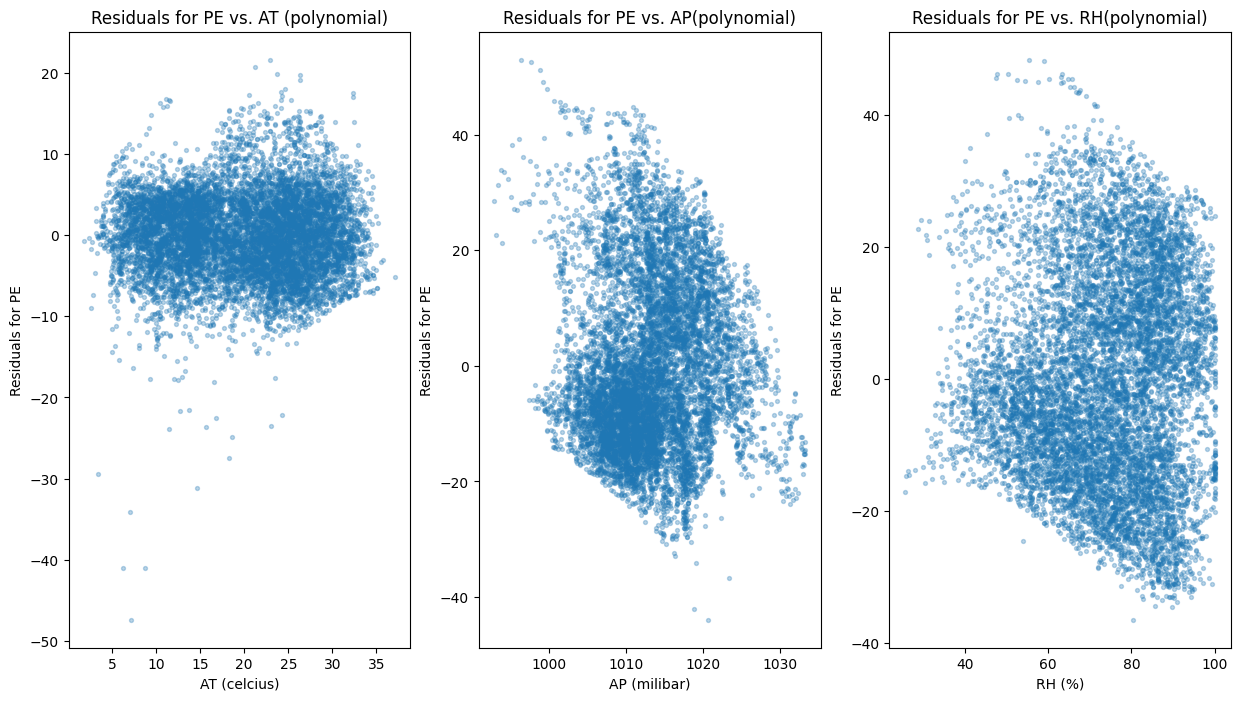

In [207]:
y_pred_AT_poly = results_AT_poly.predict(x_AT_poly)
y_pred_AP_poly = results_AP_poly.predict(x_AP_poly)
y_pred_RH_poly = results_RH_poly.predict(x_RH_poly)

#Residual calculations for each regression model with polynomial terms 
y_residuals_AT_poly = y_obs - y_pred_AT_poly
y_residuals_AP_poly = y_obs - y_pred_AP_poly
y_residuals_RH_poly = y_obs - y_pred_RH_poly


fig, axes = plt.subplots(1,3, figsize=(15,8))
plt.subplots_adjust(hspace = 0.4)
# Plot 1: Residuals vs. AT polynomial
axes[0].scatter(data["AT"], y_residuals_AT_poly, alpha = 0.3, s = 8)
axes[0].set_title("Residuals for PE vs. AT (polynomial)")
axes[0].set_xlabel("AT (celcius)")
axes[0].set_ylabel("Residuals for PE")

#Plot 3: Residuals vs. AP polynomial
axes[1].scatter(data["AP"], y_residuals_AP_poly, alpha = 0.3, s = 8)
axes[1].set_title("Residuals for PE vs. AP(polynomial)")
axes[1].set_xlabel("AP (milibar)")
axes[1].set_ylabel("Residuals for PE")

#Plot 4: Residuals vs. RH polynomial
axes[2].scatter(data["RH"], y_residuals_RH_poly, alpha = 0.3, s = 8)
axes[2].set_title("Residuals for PE vs. RH(polynomial)")
axes[2].set_xlabel("RH (%)")
axes[2].set_ylabel("Residuals for PE")

plt.show()


Compared to the residuals for non-polynomial regression, the residuals for polynomial regression show 
little to no pattern. Thus, including polynomial coefficients will improve our model. 
Now let us add the polynomial coefficients to the multiple regression model to see if the overall model has improved. 

In [208]:
x_V_new = data[["V"]].to_numpy()
x_AT_multiple_poly = poly.fit_transform(data[['AT']])  # AT, AT^2, AT^3
x_AP_multiple_poly = poly.fit_transform(data[['AP']])  # AP, AP^2, AP^3
x_RH_multiple_poly = poly.fit_transform(data[['RH']])  # RH, RH^2, RH^

# Convert to Pandas DataFrame and manually name the columns
x_AT_df = pd.DataFrame(x_AT_multiple_poly, columns=['AT', 'AT^2', 'AT^3'])
x_AP_df = pd.DataFrame(x_AP_multiple_poly, columns=['AP', 'AP^2', 'AP^3'])
x_RH_df = pd.DataFrame(x_RH_multiple_poly, columns=['RH', 'RH^2', 'RH^3'])
x_V_df = pd.DataFrame(x_V_new, columns=['V'])  # Keep V as a single column

# Concatenate all transformed variables
x_combined = pd.concat([x_AT_df, x_AP_df, x_V_df, x_RH_df], axis=1)

# Add intercept term
x_combined = sm.add_constant(x_combined)


results_multiple_poly = sm.OLS(y_obs, x_combined).fit()
print("\nRegression results for Multiple Polynomial Regression (PE vs. AT, V, AP, RH)\n")
print(results_multiple_poly.summary())



Regression results for Multiple Polynomial Regression (PE vs. AT, V, AP, RH)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:16   Log-Likelihood:                -27445.
No. Observations:                9568   AIC:                         5.491e+04
Df Residuals:                    9558   BIC:                         5.498e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

When we fit all the polynomial terms in the multiple regression, p-values for RH^3 is >0.05, thus not statistically significant. 
Note: We excluded polynomial terms of V as they were not statistically significant. 

1G) 
To detect if there is interaction between features we do this using 2 methods: 
a) First we will generate all pairwise interactions and fit the regression models 
b) Secondly, we will also calculate VIF values (Section 3.3.3 from ISLR, page 102)

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [210]:
poly_int = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
features = ["AT", "V", "AP", "RH"]
x_interaction  = poly_int.fit_transform(data[features])

feature_names = poly_int.get_feature_names_out(features)
x_interaction = pd.DataFrame(x_interaction, columns = feature_names)
x_interaction = sm.add_constant(x_interaction)

results_interaction = sm.OLS(y_obs, x_interaction).fit()

print(results_interaction.summary())
                           

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:16   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

INTERACTION TERMS THAT ARE STATISTICALLY SIGNIFICANT: P-VALUES <0.05
1. AT V
2. AT RH
3. V AP
4. AP RH

Now let us fit the model with interactions after dropping the terms where p> 0.05

In [211]:
poly_int = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
features = ["AT", "V", "AP", "RH"]
x_interaction  = poly_int.fit_transform(data[features])
feature_names = poly_int.get_feature_names_out(features)
x_interaction = pd.DataFrame(x_interaction, columns = feature_names)
x_interaction_dropped = x_interaction.drop(columns=["AT AP", "V RH"], errors="ignore")
x_interaction_dropped = sm.add_constant(x_interaction_dropped)

results_interaction_updated = sm.OLS(y_obs, x_interaction_dropped).fit()

print("Regression Results after dropping interaction terms where p>0.05\n")
print(results_interaction_updated.summary())
                           

Regression Results after dropping interaction terms where p>0.05

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.756e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:16   Log-Likelihood:                -27550.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9559   BIC:                         5.518e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

NOTE: Even though p value of AP > 0.05, based on hierarchical principle, we still need to keep AP in the regression model.


In [212]:
# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = x_interaction.columns
vif_data["VIF"] = [variance_inflation_factor(x_interaction.values, i) for i in range(x_interaction.shape[1])]

# Display VIF results
print(vif_data)

  Feature           VIF
0      AT  1.206454e+06
1       V  2.671670e+06
2      AP  1.661101e+03
3      RH  5.339093e+05
4    AT V  6.141422e+02
5   AT AP  1.206909e+06
6   AT RH  6.784677e+02
7    V AP  2.650142e+06
8    V RH  2.007281e+03
9   AP RH  5.367257e+05


NOTE: Even though p value of AP > 0.05, based on hierarchical principle, we still need to keep AP in the regression model.

1H) FITTING FULL MODEL (ALL POSSIBLE QUADRATIC AND INTERACTION TERMS) AND USING TRAIN AND TEST DATA 

FIRST, WE SPLIT THE DATA TO TEST AND TRAIN.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(data[features], y_obs, test_size = 0.3, random_state = 23)

1ST WE REVISIT MULTIPLE REGRESSION MODEL WITHOUT ANY POLYNOMIAL OR INTERACTION TERMS:

MODEL 1: WITHOUT ANY POLYNOMIAL OR INTERACTION TERMS 

In [214]:
#MULTIPLE REGRESSION MODEL WITHOUT ANY POLYNOMIAL OR INTERACTION TERMS 
x_train_model1 = pd.DataFrame(x_train, columns=features)
x_train_model1 = sm.add_constant(x_train_model1)
results_model1 = sm.OLS(y_train, x_train_model1).fit()

x_test_model1 = pd.DataFrame(x_test, columns=["AT", "V", "AP", "RH"])
x_test_model1 = sm.add_constant(x_test_model1)
print("\nMULTIPLE REGRESSION MODEL WITHOUT ANY POLYNOMIAL OR INTERACTION TERMS: ")
print(results_model1.summary())

# Predict on train and test sets
y_train_pred1 = results_model1.predict(x_train_model1)
y_test_pred1 = results_model1.predict(x_test_model1)

# Compute Train and Test MSE
train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)
print("\n")

print(f"Model 1 Train MSE: {train_mse1:.2f}")
print(f"Model 1 Test MSE: {test_mse1:.2f}")


MULTIPLE REGRESSION MODEL WITHOUT ANY POLYNOMIAL OR INTERACTION TERMS: 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.137e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:16   Log-Likelihood:                -19700.
No. Observations:                6697   AIC:                         3.941e+04
Df Residuals:                    6692   BIC:                         3.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

NEXT WE ADD ALL INTERACTION AND QUADRATIC TERMS 
MODEL 2: ADD ALL INTERACTION AND QUADRATIC TERMS 

In [215]:

x_train, x_test, y_train, y_test = train_test_split(data[features], y_obs, test_size = 0.3, random_state = 23)

# Reset index to ensure alignment
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

poly_full = PolynomialFeatures(degree=2, include_bias = False)
x_train_model2 = poly_full.fit_transform(x_train)
x_test_model2 = poly_full.fit_transform(x_test)

feature_names = poly_full.get_feature_names_out(features)
x_train_model2 = pd.DataFrame(x_train_model2, columns = feature_names)
x_test_model2 = pd.DataFrame(x_test_model2, columns = feature_names)

x_train_model2 = sm.add_constant(x_train_model2)
x_test_model2 = sm.add_constant(x_test_model2)

results_model2 = sm.OLS(y_train, x_train_model2).fit()
print("\n REGRESSION SUMMARY FOR MODEL 2 INCLUDING ALL QUADRATICS AND INTERACTION TERMS\n")
print(results_model2.summary())





 REGRESSION SUMMARY FOR MODEL 2 INCLUDING ALL QUADRATICS AND INTERACTION TERMS

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7131.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:16   Log-Likelihood:                -19211.
No. Observations:                6697   AIC:                         3.845e+04
Df Residuals:                    6682   BIC:                         3.855e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

WE WILL DROP FOLLOWING 4 TERMS AS THEY ARE STATISTICALLY INSIGNIFICANT (P-VALUE > 0.05)
AT-AP, V^2, V-AP, V-RH

EVEN THOUGH P-VALUES FOR V AND AT ARE > 0.05, BASED ON HIERARCHICAL PRINCIPLE, WE WILL INCLUDE THEM IN THE MODEL 

In [216]:
#MODEL 2
x_train, x_test, y_train, y_test = train_test_split(data[features], y_obs, test_size = 0.3, random_state = 23)

# Reset index to ensure alignment
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

poly_full = PolynomialFeatures(degree=2, include_bias = False)
x_train_model2 = poly_full.fit_transform(x_train)
x_test_model2 = poly_full.fit_transform(x_test)

feature_names = poly_full.get_feature_names_out(features)
x_train_model2 = pd.DataFrame(x_train_model2, columns = feature_names)
x_test_model2 = pd.DataFrame(x_test_model2, columns = feature_names)

# Manually drop statistically insignificant terms 
drop_terms = ["AT AP", "V^2", "V AP", "V RH"]  # Terms to remove
x_train_model2 = x_train_model2.drop(columns=drop_terms, errors="ignore")
x_test_model2 = x_test_model2.drop(columns=drop_terms, errors="ignore")

x_train_model2 = sm.add_constant(x_train_model2)
x_test_model2 = sm.add_constant(x_test_model2)

results_model2 = sm.OLS(y_train, x_train_model2).fit()
print("\n REGRESSION SUMMARY FOR MODEL 2 AFTER REMOVING INSIGNIFICANT VARIABLES\n")
print(results_model2.summary())

# Predict on train and test sets
y_train_pred2 = results_model2.predict(x_train_model2)
y_test_pred2 = results_model2.predict(x_test_model2)

# Compute Train and Test MSE
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)
print("\n")

print(f"Model 2 Train MSE: {train_mse2:.2f}")
print(f"Model 2 Test MSE: {test_mse2:.2f}")


 REGRESSION SUMMARY FOR MODEL 2 AFTER REMOVING INSIGNIFICANT VARIABLES

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9959.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:32:16   Log-Likelihood:                -19220.
No. Observations:                6697   AIC:                         3.846e+04
Df Residuals:                    6686   BIC:                         3.854e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

MSE SUMMARY: WE CAN SEE THAT MODEL 2 HAS REDUCED MSE. 

In [217]:
print(f"Model 1 Train MSE: {train_mse1:.2f}")
print(f"Model 1 Test MSE: {test_mse1:.2f}")
print("\n")
print(f"Model 2 Train MSE: {train_mse2:.2f}")
print(f"Model 2 Test MSE: {test_mse2:.2f}")


Model 1 Train MSE: 21.02
Model 1 Test MSE: 20.20


Model 2 Train MSE: 18.21
Model 2 Test MSE: 18.01


1)I) 
KNN REGRESSION - RAW DATA

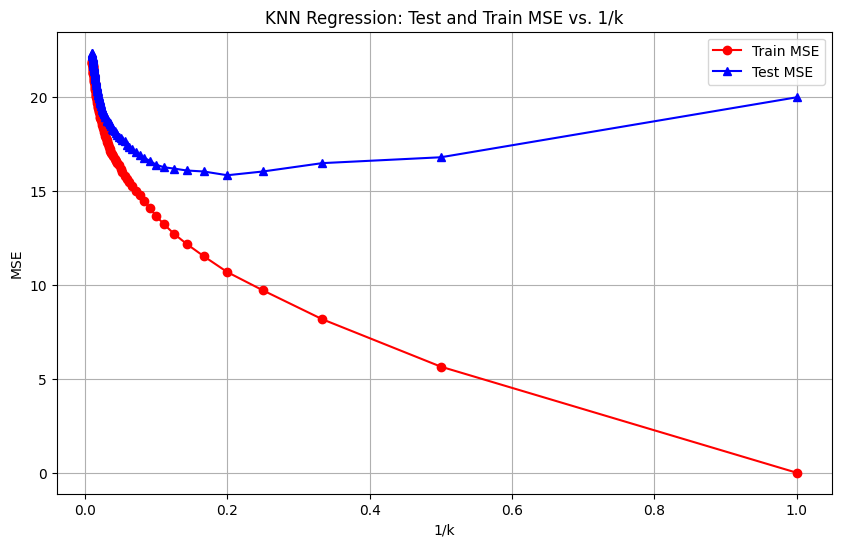

In [218]:
from sklearn.neighbors import KNeighborsRegressor
x_train, x_test, y_train, y_test = train_test_split(data[features], y_obs, test_size = 0.3, random_state = 23)
k_set = list(range(1,101,1))

train_mse_knn_raw = []
test_mse_knn_raw = []
k_inverse = []
minimum_mse_test_raw = 100
optimal_k_raw = 1

for k in k_set:
    knn =  KNeighborsRegressor(n_neighbors = k, metric = 'euclidean')
    knn.fit(x_train, y_train)

    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test) 

    train_mse_knn_raw.append(mean_squared_error(y_train, y_train_pred))
    test_mse_knn_raw.append(mean_squared_error(y_test, y_test_pred))
    k_inverse.append(1 / k)

    if mean_squared_error(y_test, y_test_pred) < minimum_mse_test_raw:
        minimum_mse_test_raw = mean_squared_error(y_test, y_test_pred)
        optimal_k_raw = k

plt.figure(figsize = (10,6))
plt.plot(k_inverse, train_mse_knn_raw, label = "Train MSE", marker = 'o', color='red')
plt.plot(k_inverse, test_mse_knn_raw, label = "Test MSE", marker = '^', color = 'blue')
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.title("KNN Regression: Test and Train MSE vs. 1/k") 
plt.legend()
plt.grid(True)
plt.show()


    

In [219]:
print("Optimal K: ", optimal_k_raw)
print(f"Minimum 1 Test MSE: {minimum_mse_test_raw:.2f}")

Optimal K:  5
Minimum 1 Test MSE: 15.85


K = 5 IS THE OPTIMAL K WHERE TEST MSE IS MINIMIZED 

2) KNN MODEL USING NORMALIZED DATA

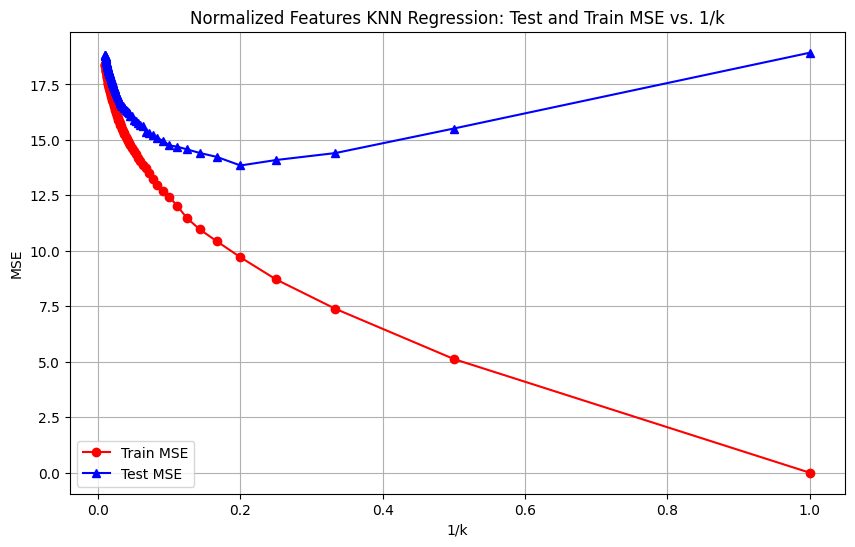

In [220]:
from sklearn.preprocessing import MinMaxScaler
train_mse_knn_scaled = []
test_mse_knn_scaled = []
k_inverse = []
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

minimum_mse_knn_scaled = 100
k_optimal_scaled = 1

for k in k_set:
    knn_scaled =  KNeighborsRegressor(n_neighbors = k, metric = 'euclidean')
    knn_scaled.fit(x_train_scaled, y_train)

    y_train_pred = knn_scaled.predict(x_train_scaled)
    y_test_pred = knn_scaled.predict(x_test_scaled) 

    train_mse_knn_scaled.append(mean_squared_error(y_train, y_train_pred))
    test_mse_knn_scaled.append(mean_squared_error(y_test, y_test_pred))
    k_inverse.append(1 / k)
    if mean_squared_error(y_test, y_test_pred) < minimum_mse_knn_scaled:
        minimum_mse_knn_scaled = mean_squared_error(y_test, y_test_pred)
        optimal_k_raw = k

plt.figure(figsize = (10,6))
plt.plot(k_inverse, train_mse_knn_scaled, label = "Train MSE", marker = 'o', color='red')
plt.plot(k_inverse, test_mse_knn_scaled, label = "Test MSE", marker = '^', color = 'blue')
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.title("Normalized Features KNN Regression: Test and Train MSE vs. 1/k") 
plt.legend()
plt.grid(True)
plt.show()

In [221]:
print("Optimal K: ", optimal_k_raw)
print(f"Minimum Test MSE: {minimum_mse_knn_scaled:.2f}")

Optimal K:  5
Minimum Test MSE: 13.85


1J) FINDINGS
KNN Regression performs better than Linear Regression with a lower test MSE
   KNN MSE: 13.85
   Linear Regression MSE: 18.01

Analysis (Reference: ISLR, Section 3.5): 

- This is because KNN model is a non-parametric method. Nnon-parametric methods do not explicitly assume a parametric
  form for f(X), and thereby provide an alternative and more flexible approach for performing regression
- Linear Regression we used makes assumptions for the form of f(X) by imposing linear and quadratic terms for features. Thus,
  the resulting model will provide a less accurate fit to the data. 
- Thus, in this situation, the true form of f(X) cannot be accurately explained by a linear regression model.
- However, KNN has downsides: it is less interpretable compared to linear regression and can be sensitive to noise leading to overfitting. Linear Regression is a simpler model and more interpretable. 




Q2 AND Q3

Displaying Page 1


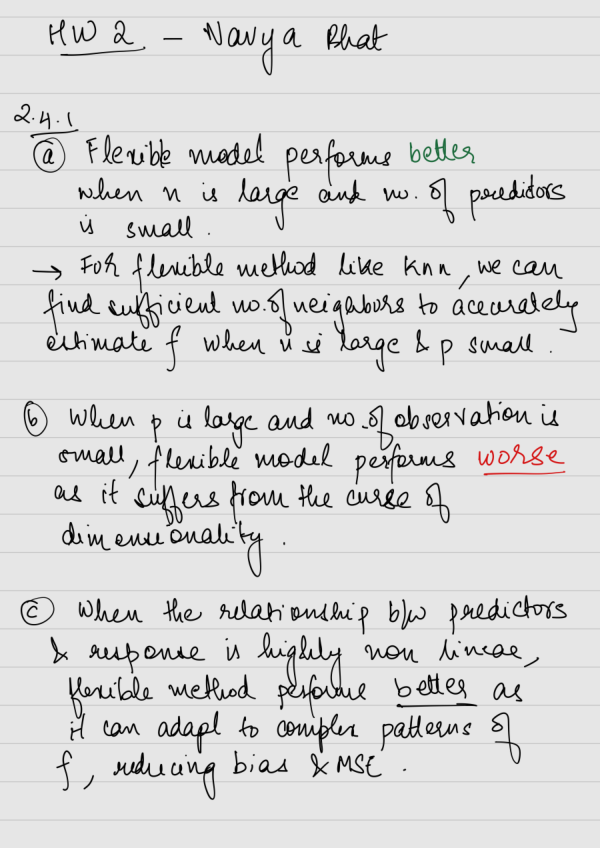

Displaying Page 2


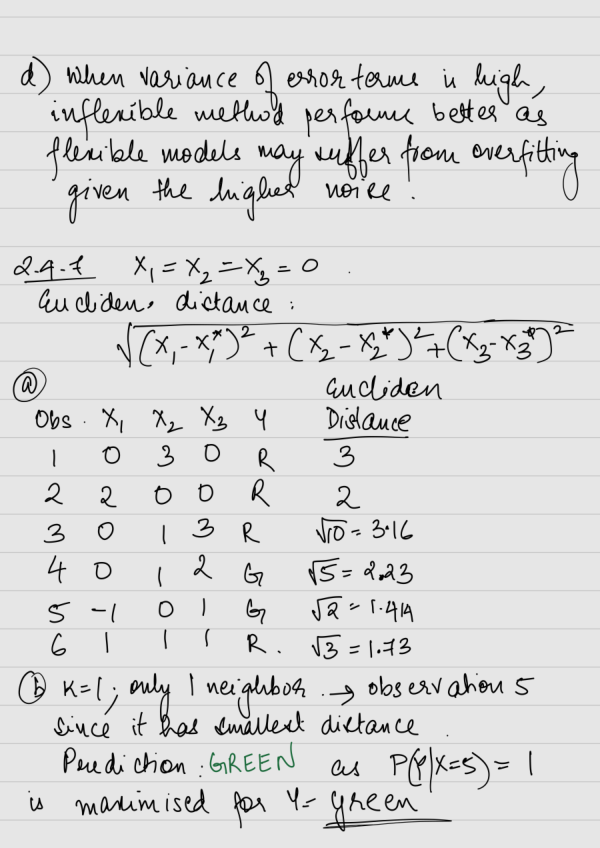

Displaying Page 3


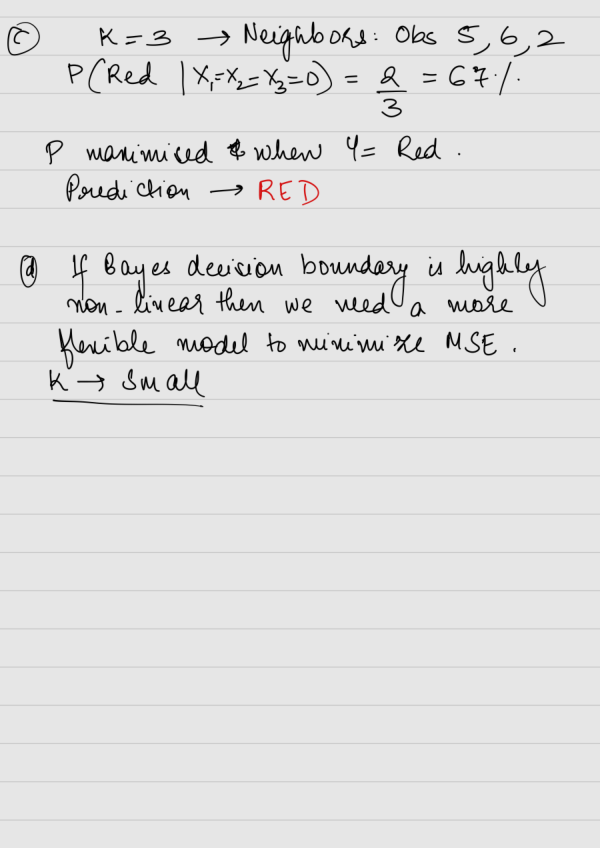

In [222]:
!pip install pymupdf pillow
import fitz  # PyMuPDF
import io
from PIL import Image
from IPython.display import display

# Load PDF
pdf_path = "hw2.pdf"  #
doc = fitz.open(pdf_path)

# Loop through all pages and display them
for page_num in range(len(doc)): 
    page = doc.load_page(page_num)  # Load each page
    pix = page.get_pixmap()  # Render page as an image
    img = Image.open(io.BytesIO(pix.tobytes("png")))  # Convert to PIL Image
    print(f"Displaying Page {page_num + 1}")  # Page number
    display(img)  # Display the image in Jupyter Notebook

References / Citations:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
2. https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features
3. ISLR: Sections 3.3.2 and 3.3.3, 3.5
4. https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence
5. https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
6. https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
7. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
8. https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

CHATGPT AND GOOGLE PROMPTS: 
1)	How to make markers smaller and more transparent in Seaborn Scatterplot
2) How to import PDF and display all pages? 
3)	How to calculate median, range, interquartile range of a dataframe in Python and how to add to existing table of statistics
4)	How to get coefficient estimates in statmodels
5)	How to add annotate each point on the scatter plot with a label? 
6)	 How do I get residuals from a multiple linear regression model ?
7)	For regression summary, instead of x1, x2, x3 how do I add column names instead? Solution: convert to dataframe	 
8)	How to generate pairwise interactions using polynomial features
9)	How to extract column names after poly.fit_transform
10)	How to drop specific interaction terms from regression model
11)	How to compute variance inflation factors for interaction terms